In [1]:
# load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Input data
P4_r = pd.read_csv('/Users/kefanyang/Desktop/122019_P4_data_process.csv')
P4 = pd.read_csv('/Users/kefanyang/Desktop/test_P4.csv')
P4_s = pd.read_csv('/Users/kefanyang/Desktop/P4_simulation.csv')
DNA_r = pd.read_csv('/Users/kefanyang/Desktop/TNA_IS_paper_writing/Figures/DNA_raw.csv')
DNA = pd.read_csv('/Users/kefanyang/Desktop/TNA_IS_paper_writing/Figures/DNA_analyzed.csv')
DNA_s = pd.read_csv('/Users/kefanyang/Desktop/TNA_IS_paper_writing/Figures/DNA_simulation.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
DNA_s.head

<bound method NDFrame.head of                 name  position original  depth
0     Independence_1        22        a    579
1     Independence_2        22        c    650
2     Independence_3        22        T    565
3     Independence_4        22        G    526
4     Independence_5        22        a    475
...              ...       ...      ...    ...
7446        UCI_4707        22        T    341
7447        UCI_4708        22        G    583
7448        UCI_4709        22        c    572
7449        UCI_4710        22        c    369
7450        UCI_4711        22        G    252

[7451 rows x 4 columns]>

In [7]:
# calculate position specific substitution error rates using groupby
P4["position_specific"] = P4.groupby(["position"])["substitution"].transform(sum)
DNA["position_specific"] = DNA.groupby(["Unnamed: 1"])["substitutions"].transform(sum)

In [10]:
P4[{"position","position_specific"}].to_csv('P4_Position_specific2.csv')

In [13]:
DNA[{"Unnamed: 1","position_specific"}].to_csv('DNA_Position_specific.csv')

In [9]:
DNA.head

<bound method NDFrame.head of             Unnamed: 0  Unnamed: 1 Unnamed: 2  Unnamed: 3  \
0       Independence_1        21.0          a       579.0   
1       Independence_2        21.0          T       650.0   
2       Independence_3        21.0          a       561.0   
3       Independence_4        21.0          T       526.0   
4       Independence_5        21.0          c       476.0   
...                ...         ...        ...         ...   
469413             NaN         NaN        NaN         NaN   
469414             NaN         NaN        NaN         NaN   
469415             NaN         NaN        NaN         NaN   
469416             NaN         NaN        NaN         NaN   
469417             NaN         NaN        NaN         NaN   

                                      original base reads  \
0       .................................................   
1       .................................................   
2       ..............................................

Text(0.5, 0, 'Position')

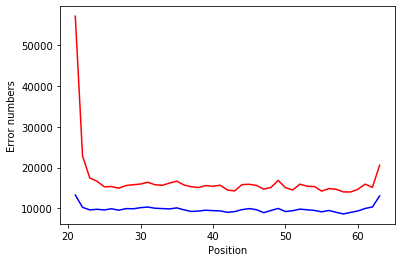

In [12]:
# plot
plt.plot(P4["position"], P4["position_specific"], 'r')
plt.plot(DNA["Unnamed: 1"], DNA["position_specific"], 'b')
plt.ylabel('Error numbers')
plt.xlabel('Position')

In [14]:
DNA_r[['original base reads']].applymap(lambda x: str.count(x, '+10')).sum()

original base reads    129
dtype: int64

In [15]:
# file for simulation
P4_s.head

<bound method NDFrame.head of                 name  Position original  depth
0     Independence_1        22        a    593
1     Independence_2        22        c    425
2     Independence_3        22        T    300
3     Independence_4        22        G    345
4     Independence_5        22        a    624
...              ...       ...      ...    ...
7446        UCI_4707        22        T    228
7447        UCI_4708        22        G    650
7448        UCI_4709        22        c    695
7449        UCI_4710        22        c    311
7450        UCI_4711        22        G    476

[7451 rows x 4 columns]>

In [16]:
# repeat reads based on it's depth, so that the total reads was obtained ->3963261.
P4_s = P4_s.loc[P4_s.index.repeat(P4_s['depth'])]
print (P4_s)

                name  Position original  depth
0     Independence_1        22        a    593
0     Independence_1        22        a    593
0     Independence_1        22        a    593
0     Independence_1        22        a    593
0     Independence_1        22        a    593
...              ...       ...      ...    ...
7450        UCI_4711        22        G    476
7450        UCI_4711        22        G    476
7450        UCI_4711        22        G    476
7450        UCI_4711        22        G    476
7450        UCI_4711        22        G    476

[3963261 rows x 4 columns]


In [83]:
P4_s['depth']

0       593
0       593
0       593
0       593
0       593
       ... 
7450    476
7450    476
7450    476
7450    476
7450    476
Name: depth, Length: 3963261, dtype: int64

In [25]:
# import random  
from random import sample 

In [38]:
# take percentage of samples from the whole dataset.
random_subset = P4_s.sample(n=1188978) # n is variable based on percentage of sample you want. e.g. for 30%, n=1188978
print(random_subset)
random_subset.groupby(["name"]).agg({'Position':'first', 'original': 'first', 'depth': 'first'}).reset_index()

                   name  Position original  depth
6905           UCI_4166        22        a    420
6255           UCI_3516        22        G    336
2014  Independence_2015        22        T    612
3493            UCI_754        22        c    507
5167           UCI_2428        22        G    449
...                 ...       ...      ...    ...
6568           UCI_3829        22        c    931
326    Independence_327        22        T    556
3096            UCI_357        22        c    861
5209           UCI_2470        22        c   1005
1547  Independence_1548        22        T    671

[1188978 rows x 4 columns]


In [39]:
# Unique read of different percentage of samples
random_subset = P4_s.sample(n=1188978) # n is variable.
print(random_subset)
random_subset.groupby(["name"]).agg({'Position':'first', 'original': 'first', 'depth': 'first'}).reset_index()
# number of rows is equal to unique reads.

,name,Position,original,depth
0,Independence_1,22,a,593
1,Independence_10,22,a,425
2,Independence_100,22,G,410
3,Independence_1000,22,T,380
4,Independence_1001,22,a,620
5,Independence_1002,22,a,818
6,Independence_1003,22,T,236
7,Independence_1004,22,T,292
8,Independence_1005,22,a,209
9,Independence_1006,22,c,452
